# Data Analysis of Used Cars

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import and inspect the data.

In [2]:
cars = pd.read_csv(r'/Users/andressotelo/Documents/Datasets/USA_cars_datasets.csv')
print(cars.shape)
cars.head()

(2499, 13)


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


#### Not all columns are useful for analyzing this dataset, I will drop unnecessary columns and clean up the data.

In [3]:
cars = cars.drop(columns = ['Unnamed: 0', 'vin', 'lot', 'country'])
print(cars.shape)
cars.head()

(2499, 9)


,price,brand,model,year,title_status,mileage,color,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,22 hours left


In [4]:
# Let's check for missing values.

print(cars.isnull().sum())
print('-----------------')
print('There are no missing values.')

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
condition       0
dtype: int64
-----------------
There are no missing values.


In [5]:
cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


#### The minimum price is 0, something went wrong when recording that observation so I will remove that since it is considered an "outlier".

In [6]:
cars.loc[cars['price'] == 0]

,price,brand,model,year,title_status,mileage,color,state,condition
141,0,dodge,van,2008,salvage insurance,177948.0,orange,utah,2 days left
144,0,dodge,door,2014,salvage insurance,123660.0,silver,utah,2 days left
196,0,ford,mpv,2017,clean vehicle,76858.0,white,texas,2 days left
285,0,ford,door,2000,salvage insurance,124969.0,black,oklahoma,17 hours left
290,0,mazda,door,2009,salvage insurance,117541.0,gray,indiana,16 hours left
293,0,chevrolet,pickup,1998,salvage insurance,258631.0,gray,texas,17 hours left
297,0,honda,door,2003,salvage insurance,152608.0,white,arkansas,17 hours left
305,0,ford,door,2003,salvage insurance,246065.0,gold,kansas,8 days left
309,0,chevrolet,door,2004,salvage insurance,0.0,maroon,wyoming,18 hours left
310,0,chevrolet,door,2003,salvage insurance,194673.0,gray,texas,18 hours left


In [7]:
print('There are 41 cars that have a value of $0.')

There are 41 cars that have a value of $0.


#### Let's investigate for unusally low prices in the dataset.

In [8]:
cars.loc[cars['price'] <= 500]

,price,brand,model,year,title_status,mileage,color,state,condition
141,0,dodge,van,2008,salvage insurance,177948.0,orange,utah,2 days left
144,0,dodge,door,2014,salvage insurance,123660.0,silver,utah,2 days left
188,175,chrysler,door,2000,salvage insurance,231240.0,red,north carolina,3 days left
196,0,ford,mpv,2017,clean vehicle,76858.0,white,texas,2 days left
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,kentucky,3 days left
209,25,chrysler,door,2005,salvage insurance,151815.0,silver,massachusetts,3 days left
284,25,dodge,door,2007,salvage insurance,160528.0,dark blue,minnesota,17 hours left
285,0,ford,door,2000,salvage insurance,124969.0,black,oklahoma,17 hours left
290,0,mazda,door,2009,salvage insurance,117541.0,gray,indiana,16 hours left
293,0,chevrolet,pickup,1998,salvage insurance,258631.0,gray,texas,17 hours left


#### There are 77 cars with a value of $500 or less. Let's drop those rows.

In [9]:
cars.drop(cars[cars.price <= 500].index, inplace = True)
print(cars.shape)

(2422, 9)


In [10]:
# Display descriptive statistics after dropping rows with very low price.

cars.describe()

,price,year,mileage
count,2422.000000,2422.000000,2.422000e+03
mean,19362.680017,2017.067713,4.844296e+04
std,11831.040901,2.615912,5.011876e+04
min,600.000000,1973.000000,0.000000e+00
25%,10900.000000,2016.000000,2.115175e+04
50%,17300.000000,2018.000000,3.482950e+04
75%,25900.000000,2019.000000,5.859850e+04
max,84900.000000,2020.000000,1.017936e+06


#### The dataset itself is not too messy so there's not much cleaning up to do. The columns that I removed are: vin number, lot, country of origin and an unnamed column. I also dropped rows that listed a price of $500 or under. The final dataset that I will work with consists of 2,422 rows and 9 columns.

## Exploratory Data Analysis

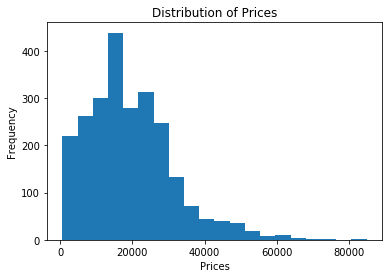

In [11]:
# Let's visualize the distribution of prices.

plt.hist(cars['price'], bins = 20)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [106]:
# Correlation Matrix

cars.corr().round(2)

,price,year,mileage
price,1.00,0.36,-0.38
year,0.36,1.00,-0.61
mileage,-0.38,-0.61,1.00


In [140]:
# Popular brands

popular_brands = cars['brand'].value_counts().reset_index()
popular_brands = pd.DataFrame(popular_brands)
popular_brands = popular_brands.rename(columns = {'index':'brand', 'brand':'count'})
popular_brands = popular_brands.sort_values(by = 'count', ascending = False)
popular_brands

,brand,count
0,ford,1206
1,dodge,429
2,nissan,311
3,chevrolet,274
4,gmc,38
5,jeep,28
6,bmw,16
7,chrysler,16
8,hyundai,15
9,infiniti,12


In [108]:
top_five_cars = popular_brands[0:5]
top_five_cars

,brand,count
0,ford,1206
1,dodge,429
2,nissan,311
3,chevrolet,274
4,gmc,38


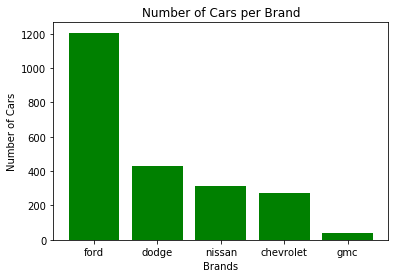

In [109]:
plt.bar(top_five_cars['brand'], top_five_cars['count'], color = 'green')
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Brand')
plt.show()

In [136]:
# Create a function to show box plots based on category of choice.

from collections import Counter

def boxplot_of_categories(data_frame, categorical_column, num_column, limit):
    keys = []
    for i in dict(Counter(cars[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    cars_new = cars[cars[categorical_column].isinkeys()]
    sns.set()
    sns.boxplot(x = cars_new[categorical_column], y = cars_new[num_column])
    plt.show()

['ford', 'dodge', 'nissan', 'chevrolet', 'gmc']


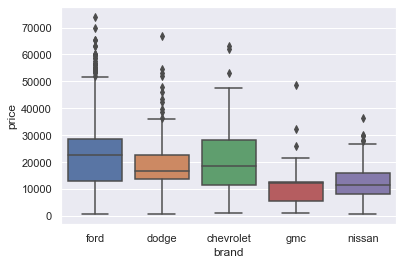

In [137]:
get_boxplot_of_categories(cars, 'brand', 'price', 5)

['ford', 'dodge', 'nissan', 'chevrolet', 'gmc']


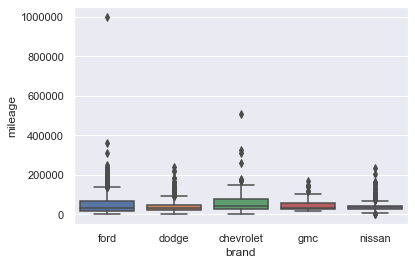

In [146]:
get_boxplot_of_categories(cars, 'brand', 'mileage', 5)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

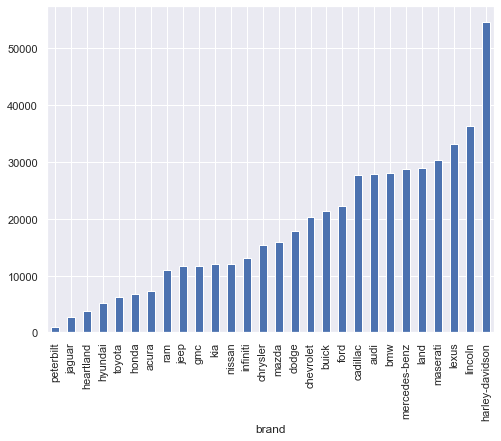

In [139]:
# Mean price of each brand.

cars.groupby('brand')['price'].mean().sort_values().plot(kind = 'bar', figsize = (8,6))
plt.tight_layout

#### The highest value for the average price of the brand is Harley Davidson, however, that is based on only 1 observation that has a Harley Davidson so the average for some brands may not be a good measure of value.

#### Now let's visualize which years are the most common in this dataset.

In [75]:
year = cars['year'].value_counts()
year = pd.DataFrame(year).reset_index()
year = year.rename(columns = {'index':'year', 'year':'count'})
year = year.sort_values(by = 'year', ascending = False).reset_index(drop = True)
year.head()

,year,count
0,2020,47
1,2019,892
2,2018,394
3,2017,375
4,2016,203


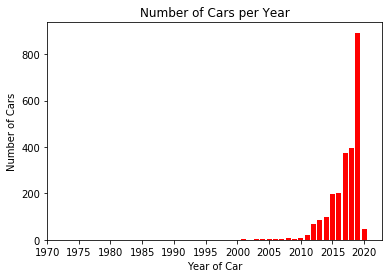

In [56]:
plt.bar(year['year'], year['count'], align = 'center', color = 'red')
plt.xticks(range(1970,2021,5))
plt.xlabel('Year of Car')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Year')

plt.show()

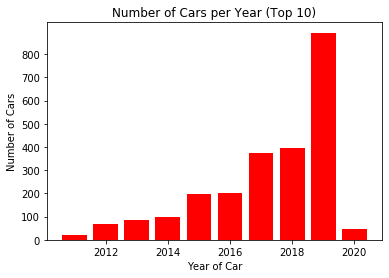

In [60]:
top_ten_cars = year.sort_values(by = 'count', ascending = False)[0:10]
plt.bar(top_ten_years['year'], top_ten_years['count'], color = 'red')
plt.xlabel('Year of Car')
plt.ylabel('Number of Cars')
plt.yticks(range(0,850,100))
plt.title('Number of Cars per Year (Top 10)')
plt.show()

#### The bar chart above lists the top 10 cars in terms of the yearly model. The 2019 models is the most common car, by far.

#### Let's visualize the most popular colors of the car.

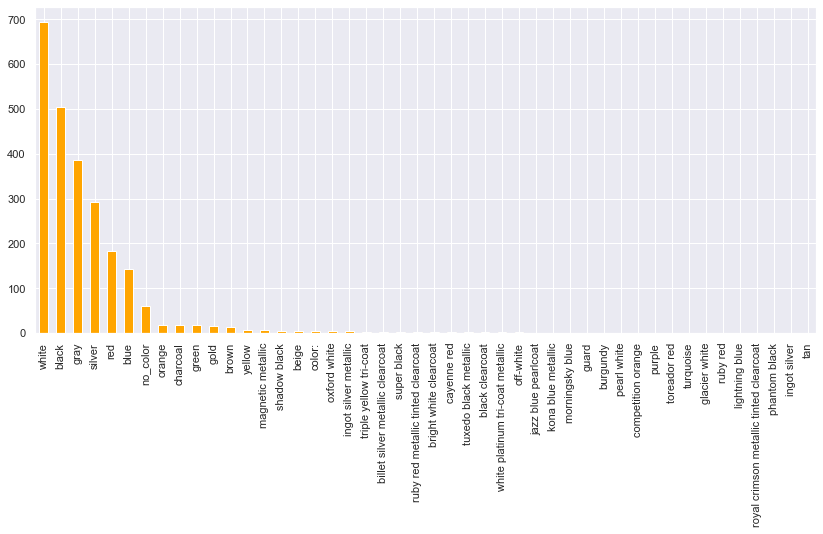

In [142]:
cars['color'].value_counts().sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6), color = 'orange')
plt.show()

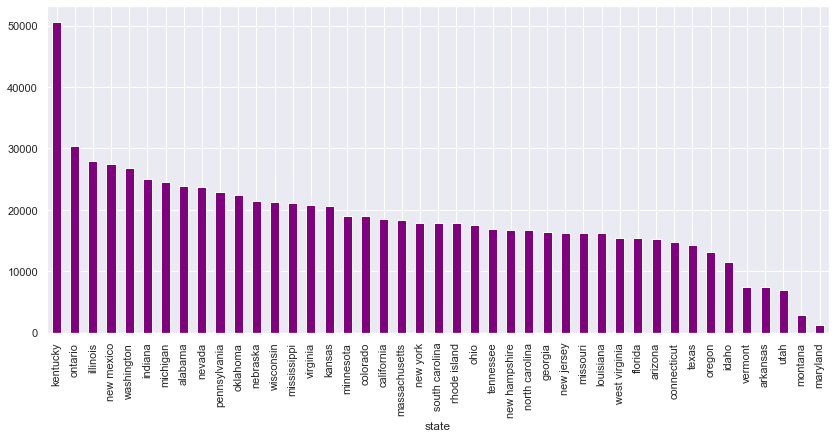

In [144]:
# Let's look at how the average price differs from state to state.

cars.groupby('state')['price'].mean().sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6), color = 'purple')
plt.show()

## Machine Learning Models to Predict Price

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [13]:
x = cars[['brand', 'mileage', 'year', 'title_status']]
y = cars['price']
x.head()

,brand,mileage,year,title_status
0,toyota,274117.0,2008,clean vehicle
1,ford,190552.0,2011,clean vehicle
2,dodge,39590.0,2018,clean vehicle
3,ford,64146.0,2014,clean vehicle
4,chevrolet,6654.0,2018,clean vehicle


In [33]:
# Convert categorical columns to numeric columns with One Hot Encoding.

x_numeric = pd.get_dummies(x, columns = ['brand', 'title_status'])
x_numeric.head()

,mileage,year,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,...,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram,brand_toyota,title_status_clean vehicle,title_status_salvage insurance
0,274117.0,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,190552.0,2011,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,39590.0,2018,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,64146.0,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6654.0,2018,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_numeric, y, test_size = 0.2, random_state = 42)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred = lr_model.predict(X_test)

In [67]:
# Side by side comparison of actual values versus predicted values.

y_and_y_pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
y_and_y_pred.head(10)

,Actual,Predicted
579,7200,18011.507143
1925,11200,17528.419272
814,30000,18737.834235
1117,1700,1720.535647
821,16300,19756.959612
771,22700,18200.105636
845,27900,17016.242182
1380,27500,25070.557117
1382,19100,24520.161856
1893,24970,21509.942824


In [56]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 96539584.05377714
Root Mean Squared Error: 9825.455920911616
R squared: 0.32999850956171506


#### The Mean Squared Error score is very high and the R-squared score is very low (33%), so this is not a good model. Keep in mind that I didn't normalize the data. The following model will normalize the data, which should give us a better model. 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x_numeric, y, random_state=0)
pipeline = Pipeline(steps = [('Scaled',StandardScaler()), ('model', LinearRegression())])

In [101]:
# Scaling the target variable (y).

model = TransformedTargetRegressor(regressor = pipeline, transformer = StandardScaler())

In [98]:
model.fit(X_test, y_test)
y_scaled_pred = model.predict(X_test)

/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/bas

In [100]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_scaled_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_scaled_pred)))
print('R squared:', metrics.r2_score(y_test, y_scaled_pred))

Mean Squared Error: 72282350.73771086
Root Mean Squared Error: 8501.902771598301
R squared: 0.3682526224262398


#### After scaling (mean = 0, var = 1) the feature columns and the target column (price), we can see that the RMSE is slightly smaller and the R-squared score is slightly better at about 37%. In conclusion, this is not an accurate model to predict the price of a car. 